In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from time import sleep
from dask import delayed

In [3]:
def avg(elements):
    sleep(1)
    return sum(elements) / len(elements)

In [4]:
def add(a, b):
    sleep(1)
    return a + b

In [5]:
l1 = np.random.random(10)
l2 = np.random.random(20)

In [6]:
%%time
l1_avg = avg(l1)
l2_avg = avg(l2)
result = add(l1_avg, l2_avg)

CPU times: user 959 µs, sys: 1.64 ms, total: 2.59 ms
Wall time: 3.01 s


In [7]:
result

1.0938420687507404

In [8]:
%%time
l1_avg = delayed(avg)(l1)
l2_avg = delayed(avg)(l2)
result = delayed(add)(l1_avg, l2_avg)

CPU times: user 947 µs, sys: 343 µs, total: 1.29 ms
Wall time: 1.01 ms


In [9]:
result

Delayed('add-ed6d5eae-f771-4d4d-aba8-6e3a94f15ae3')

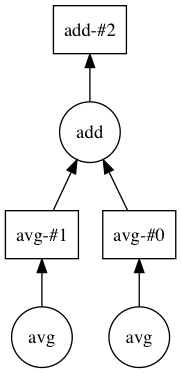

In [10]:
result.visualize()

In [11]:
%%time
result.compute()

CPU times: user 7.19 ms, sys: 4.53 ms, total: 11.7 ms
Wall time: 2.03 s


1.0938420687507404

### for-loop example with NumPy

In [12]:
def power(x):
    return x**2

In [13]:
datapoints = [100, 200, 300, 400]

In [14]:
results = []

In [15]:
%%time
for p in datapoints:
    r1 = power(p)
    r2 = add(p, p)
    r3 = add(r1, r2)
    results.append(r3)

CPU times: user 5.8 ms, sys: 2.66 ms, total: 8.46 ms
Wall time: 8.02 s


### for-loop example with dask.delayed

In [16]:
%%time
for p in datapoints:
    r1 = delayed(power)(p)
    r2 = delayed(add)(p, p)
    r3 = delayed(add)(r1, r2)
    results.append(r3)

CPU times: user 2.05 ms, sys: 1.59 ms, total: 3.64 ms
Wall time: 2.25 ms


In [17]:
output = delayed(sum)(results)
output

Delayed('sum-c4b887b9-c8f1-4cbd-8ec6-9a9d26ed76b3')

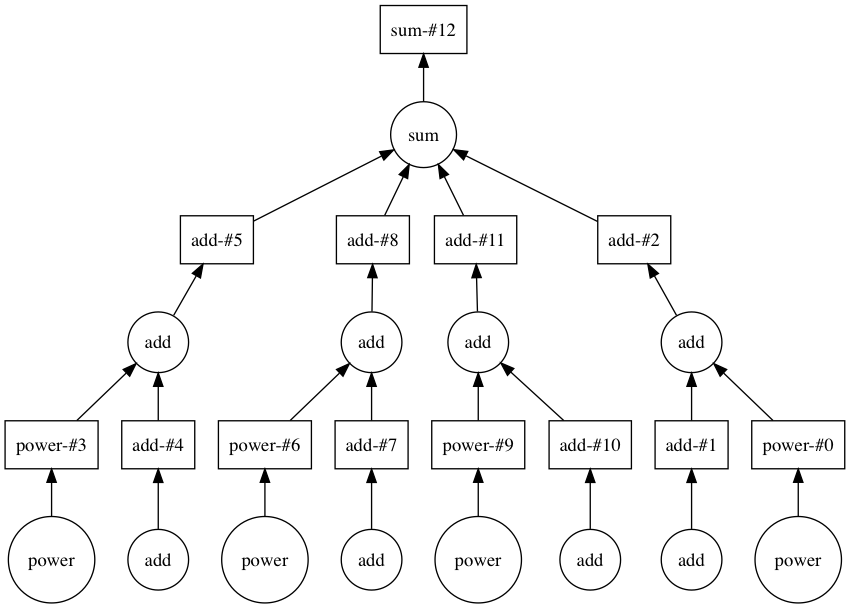

In [18]:
output.visualize()

In [19]:
%%time
output.compute()

CPU times: user 5.5 ms, sys: 3.45 ms, total: 8.95 ms
Wall time: 2.01 s


604000